In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot

In [3]:
def read_root_file(root_file_path):
    with uproot.open(root_file_path) as root_file:
        photon_tree = root_file["arrival_photons_tree"]

        photon_times = photon_tree["PhotonArrivalTime"].array()

        return photon_times

In [4]:
background_root_file = "/home/lane/Software/src/lumilar/system/analysis/data/bxdecay_Bi214.root"
photon_times = read_root_file(background_root_file)

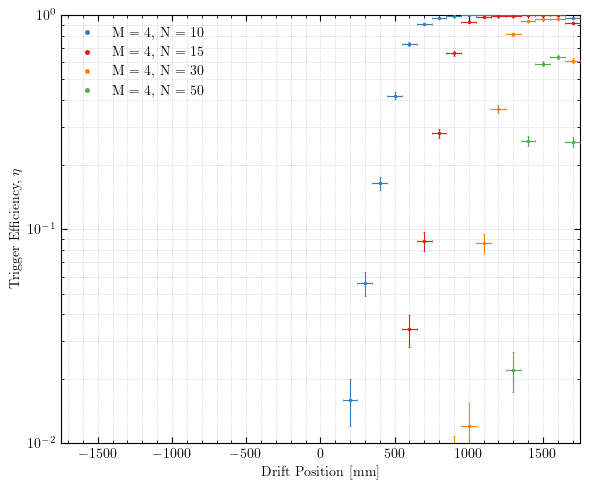

In [6]:
import matplotlib as mpl

mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rc('text', usetex=True)

# Define the figure size
fig, ax = plt.subplots(figsize=(6, 5))

unique_combinations = set(zip(m_values, n_values))
colors = ['#E41A1C', '#377EB8', '#4DAF4A', '#FF7F00', '#984EA3', '#A65628', '#F781BF', '#999999']

color_mapping = {}
for i, comb in enumerate(unique_combinations):
    color_mapping[comb] = colors[i % len(colors)]

for i in range(len(drift_distance)):
    efficiency = efficiencies[i]
    if efficiency > 0.002:  
        color = color_mapping[(m_values[i], n_values[i])]
        ax.errorbar(drift_distance[i], efficiencies[i], yerr=efficiency_errors[i], xerr=100/2.0,
                marker="o", markeredgewidth=0.5, capsize=1.0, markerfacecolor=color,
                markeredgecolor=color, ms=2, color=color, lw=0.0, elinewidth=0.8,
                zorder=10)

sorted_combinations = sorted(unique_combinations, key=lambda comb: comb[1])

handles = []
for comb in sorted_combinations:
    color = color_mapping[comb]
    line = ax.errorbar([], [], yerr=0.1, fmt='o', color=color, 
                       markeredgewidth=0.5, capsize=1.0, markerfacecolor=color,
                       markeredgecolor=color, ms=3, lw=0.0, elinewidth=0)
    handles.append(line)

legend = ax.legend(handles=handles, labels=[f'M = {comb[0]}, N = {comb[1]}' for comb in sorted_combinations], loc='upper left', fontsize=10, frameon=False)

ax.set_xlabel(r"Drift Position [mm]")
ax.set_ylabel(r"Trigger Efficiency, $\eta$")

ax.set_ylim(1e-2, 1)
ax.set_xlim(-1750, 1750)

# Tick style
ax.tick_params(which='both', direction='in', top=True, right=True, length=4)
ax.tick_params(which='minor', length=2)
ax.minorticks_on()

# Grid style
ax.grid(which='both', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)
ax.set_yscale('log')

plt.tight_layout()
plt.show()